In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# functions
def clip(x, path):
    for i in range(len(x)):
        if x[i] >= path:
            x[i] %= path

In [3]:
# starting main
# if __name__ == "__main__":

# mpl evn set
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

# init parameters
path = 5000     # 环形公路的长度
n = 100         # 公路中的车辆数目
v0 = 50          # 车辆的初始速度
p = 0.3         # 随机减速概率
Times = 3000

np.random.seed(0)
x = np.random.rand(n) * path
x.sort()
v = np.tile([v0], n).astype(np.float)

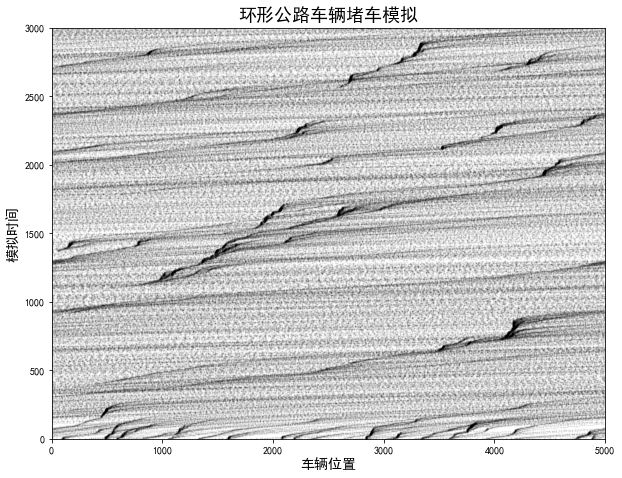

In [4]:
plt.figure(figsize=(9, 7), facecolor='w')

for t in range(Times):
    plt.scatter(x, [t]*n, s=1, c='k', alpha=0.05)
    for i in range(n):
        if x[(i+1)%n] > x[i]:
            d = x[(i+1) % n] - x[i]   # 距离前车的距离
        else:
            d = path - x[i] + x[(i+1) % n]
        if v[i] < d:
            if np.random.rand() > p:
                v[i] += 1
            else:
                v[i] -= 1
        else:
            v[i] = d - 1
    v = v.clip(0, 150)
    x += v
    clip(x, path)

plt.xlim(0, path)
plt.ylim(0, Times)
plt.xlabel('车辆位置', fontsize=14)
plt.ylabel('模拟时间', fontsize=14)
plt.title('环形公路车辆堵车模拟', fontsize=18)
plt.tight_layout(pad=2)
plt.show()